In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'
df = pd.read_csv(url)
df=pd.DataFrame(df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Data has 4177 rows and 9 columns

In [4]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
s1 = lenc.fit_transform(df['Sex'])
df['Sex'] = s1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


Converted string labels to usable numbers

In [5]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

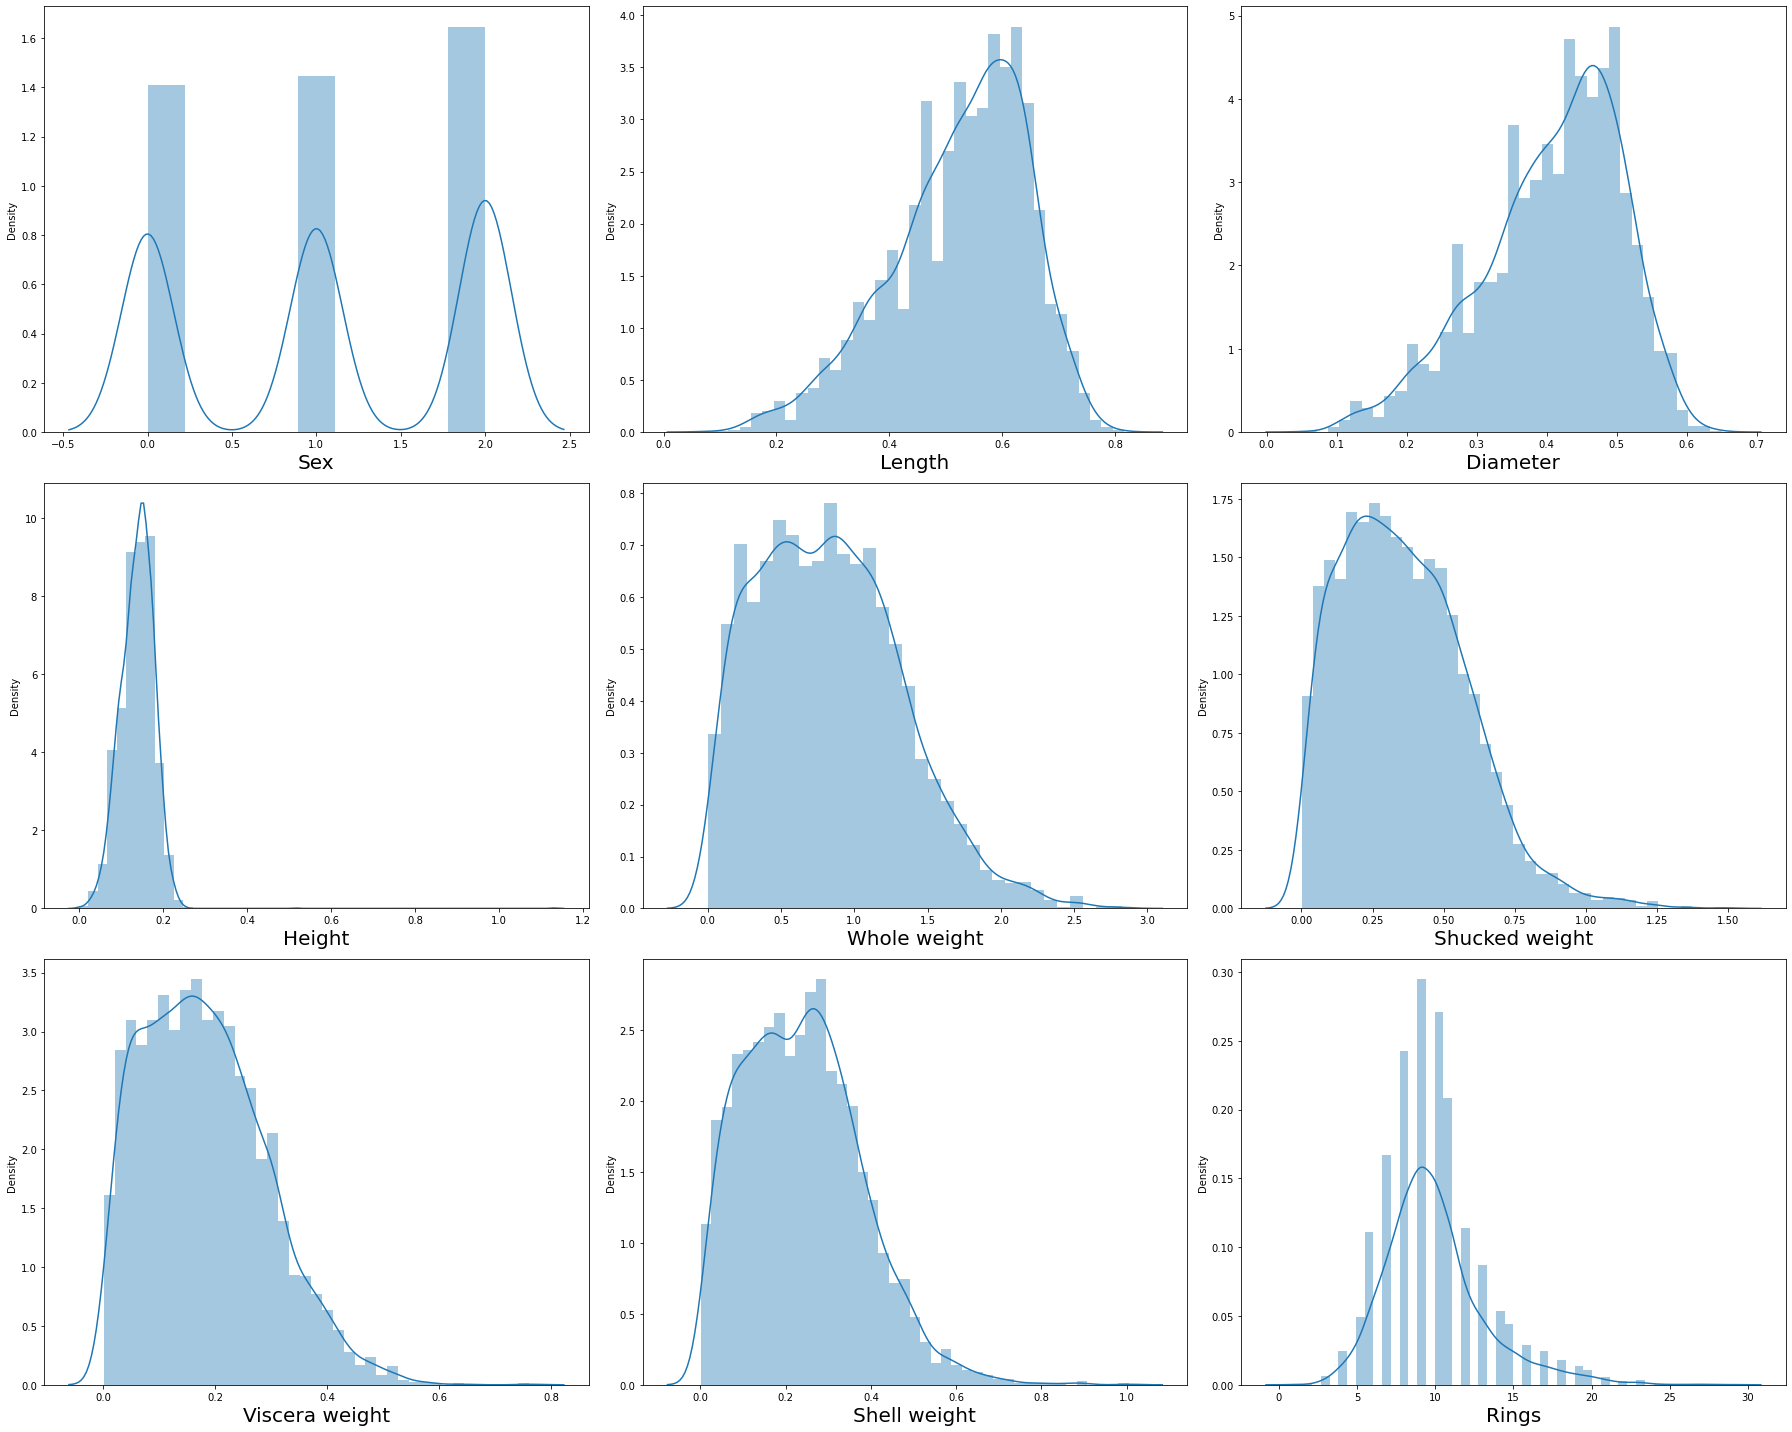

In [8]:
plt.figure(figsize=(25,20))
plotnumber = 1
for c in df:
    ax= plt.subplot(3,3,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

In [10]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Observations
1. No missing value
2. There are 0 values existing in Height which is not possible
3. Outliers in Diameter, Height, Whole weight, Shucked weight, Viscera weight and Shell weight
4. Sex is discrete data
5. Skew visible in all factors

In [32]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(missing_values = 0.0, n_neighbors = 5)
df1 = knnimp.fit_transform(df[['Height']])
df1
df['Height'] = df1
df['Rings'] = df['Rings'] + 1.5
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


The height has been replaced with apt values based on similar values in other columns 

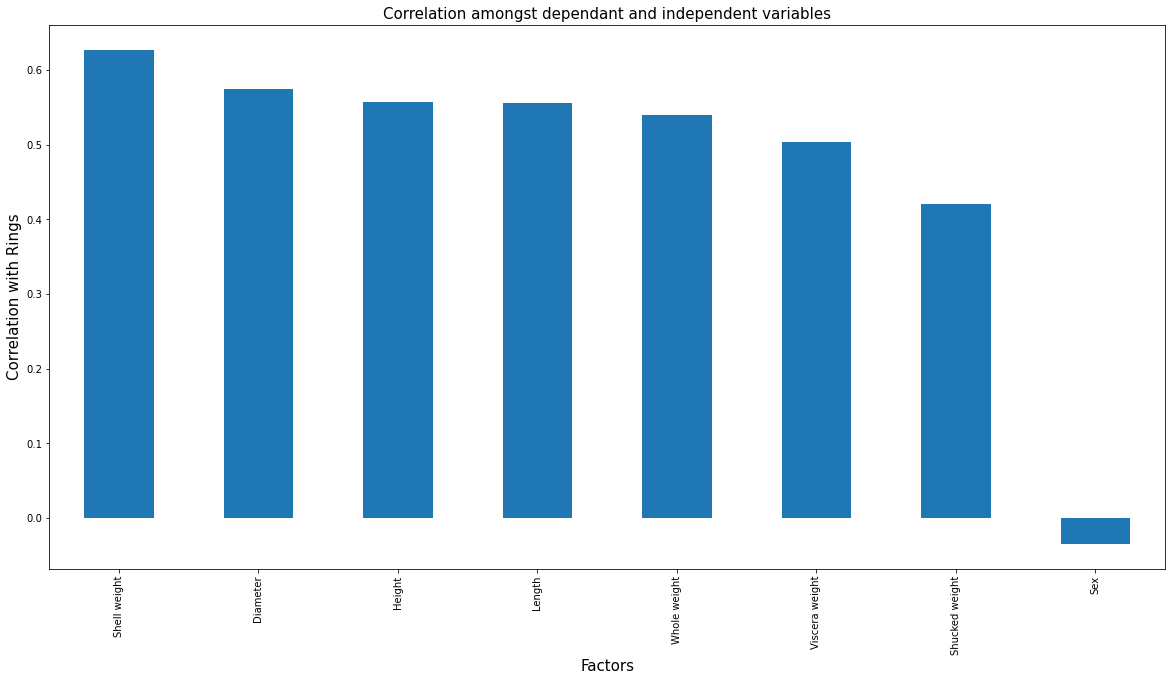

In [33]:
df2 = df.corr()
plt.figure(figsize=(20,10))
df2['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar')
plt.xlabel('Factors', fontsize = 15)
plt.ylabel('Correlation with Rings', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

Correlation is low with sex. Correlation with the rest of the factors is very high

In [34]:
#Removing the skew caused by outliers
from scipy.stats import zscore
z= np.abs(zscore(df.drop(columns=['Rings', 'Sex'])))
dfn=df[(z<3).all(axis=1)]
dfn.shape

(4086, 9)

In [35]:
4086/4177

0.9782140292075653

Data loss is only around 2%. Acceptable

In [36]:
dfn.skew()

Sex              -0.092843
Length           -0.632676
Diameter         -0.604485
Height           -0.247294
Whole weight      0.324392
Shucked weight    0.450039
Viscera weight    0.430403
Shell weight      0.358382
Rings             1.136695
dtype: float64

Skewness still persists in columns of Length, Diameter. 

In [37]:
X = dfn.drop(columns = 'Rings')
y = dfn['Rings']

In [81]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
X1= X.copy()
X1= power.fit_transform(X1)
X1 = pd.DataFrame(X1)
X1.columns = X.columns
X1['Sex'] = X['Sex']
X1['Sex'] = X1['Sex'].replace(0,3)
X1['Sex'] = X1['Sex'].replace(np.nan,3)
X1.skew()

Sex              -0.017694
Length           -0.084051
Diameter         -0.080780
Height           -0.016110
Whole weight     -0.018221
Shucked weight    0.020316
Viscera weight    0.034359
Shell weight      0.017046
dtype: float64

The skewness is removed (Power transformation) and outliers are gone. The data is ready to model.

C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

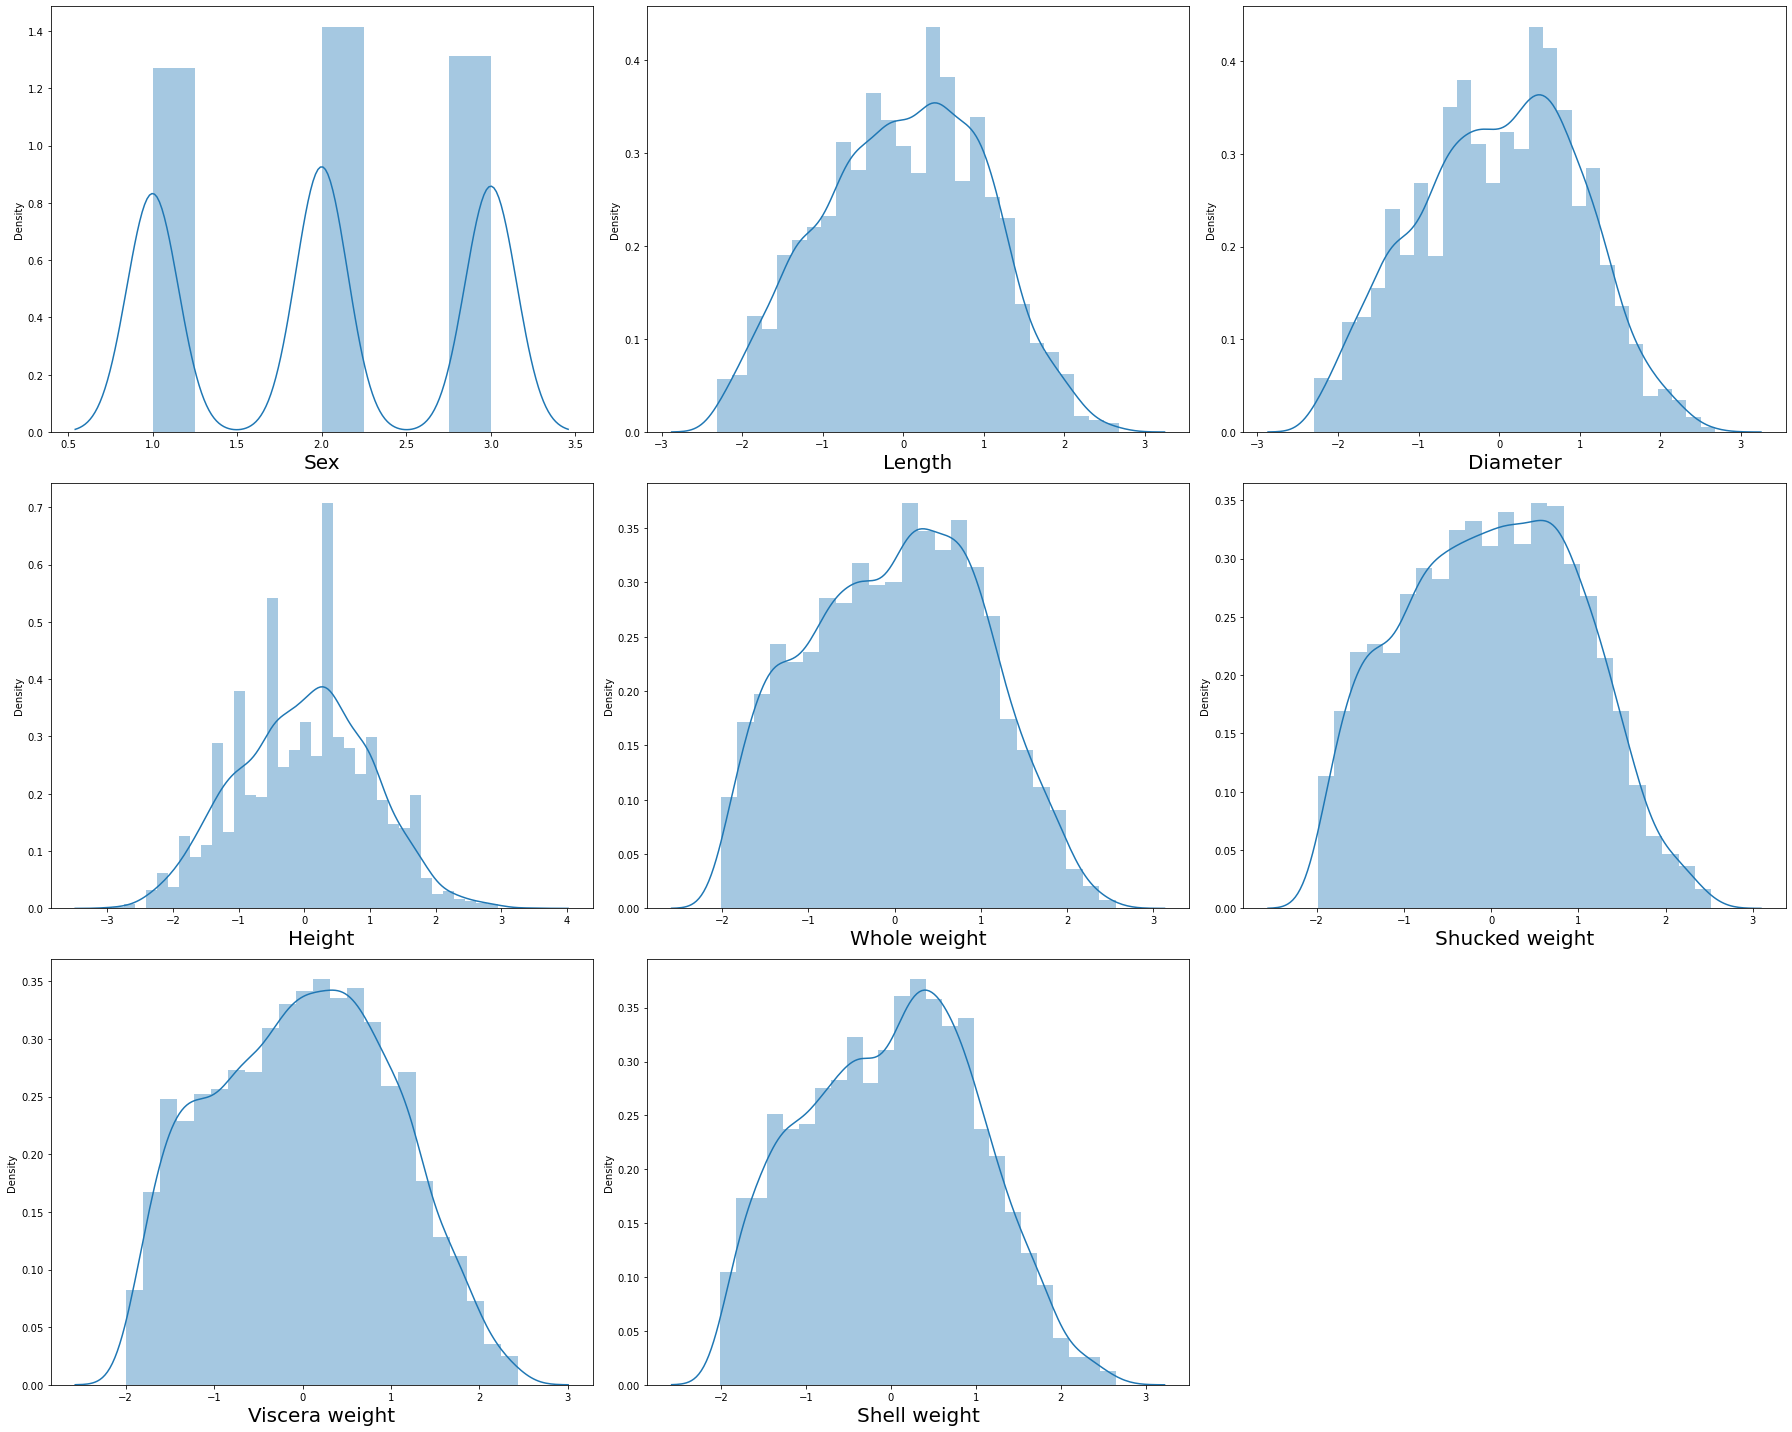

In [82]:
plt.figure(figsize=(25,20))
plotnumber = 1
for c in X1:
    ax= plt.subplot(3,3,plotnumber)
    sns.distplot(X1[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

All data is approaching normal behaviour

In [83]:
X1.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4086.000000,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03
mean,2.009790,3.267088e-16,-6.793391e-16,2.913317e-16,2.925815e-16,1.268361e-16,2.992114e-16,6.195077e-17
std,0.803848,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00
min,1.000000,-2.306944e+00,-2.300327e+00,-2.917981e+00,-2.019420e+00,-1.989702e+00,-2.000612e+00,-2.013672e+00
25%,1.000000,-7.340567e-01,-6.975985e-01,-6.690508e-01,-7.732483e-01,-7.785320e-01,-7.966016e-01,-7.759903e-01
50%,2.000000,3.605139e-02,2.577899e-02,-7.076296e-03,5.645150e-02,2.385342e-02,2.676343e-02,6.190881e-02
75%,3.000000,7.500896e-01,7.595778e-01,6.983186e-01,7.610761e-01,7.672400e-01,7.508064e-01,7.285562e-01
max,3.000000,2.676384e+00,2.682886e+00,3.446290e+00,2.562653e+00,2.522962e+00,2.434218e+00,2.654095e+00


In [84]:
X1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [85]:
#Calculating multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
     # Calculating VIF
     vif = dict()
     vif["FeatureColumns"] = Data.columns
     vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
     return(pd.DataFrame(vif))

In [86]:
CalculateVIF(X1)

,FeatureColumns,VIF
0,Sex,1.003097
1,Length,34.191692
2,Diameter,32.970892
3,Height,6.467684
4,Whole weight,128.358921
5,Shucked weight,34.079406
6,Viscera weight,21.268892
7,Shell weight,28.438208


Multicollinearity is very high. We'll have to get rid of some factors

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k=8)
fit = bf.fit(X1,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X1.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(8,'Score'))

     Feature name       Score
7    Shell weight  183.499781
3          Height  158.414714
2        Diameter  153.928589
4    Whole weight  145.996612
1          Length  145.583563
6  Viscera weight  135.427013
5  Shucked weight  108.448312
0             Sex    3.156421


All features are relevant. So, shall proceed without removing any columns

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X1,y, test_size = 0.25, random_state = 55)
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
kn = KNeighborsRegressor()
from sklearn.metrics import r2_score

In [96]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
kn.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [94]:
print(lr.score(x_test, y_test), dt.score(x_test, y_test), kn.score(x_test, y_test), rf.score(x_test, y_test))

0.5025416527024238 0.11618917128367945 0.49788109116739965 0.5373750628452632


The accuracy in all models is low

In [99]:
#Cross validating using lasso and ridge CV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lcv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lcv.fit(x_train, y_train)
alpha = lcv.alpha_
alpha

3.6341095719917164e-05

In [100]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.5025347723476026

In [101]:
rcv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01), normalize = True)
rcv.fit(x_train, y_train)
al = rcv.alpha_
al

0.001

In [102]:
ridge_reg = Ridge(al)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.001)

In [103]:
ridge_reg.score(x_test, y_test)

0.5025416348116859

The accuracy is only around 50% even with Lasso and Ridge regression 

In [114]:
#Removing last 4 columns from SelectKBest
X11 = X1.drop(columns = ['Sex', 'Shucked weight', 'Viscera weight', 'Length'])
x_tr, x_te, y_tr, y_te = train_test_split(X11,y, test_size = 0.25, random_state = 55)
lr.fit(x_tr, y_tr)
dt.fit(x_tr, y_tr)
kn.fit(x_tr, y_tr)
rf.fit(x_tr, y_tr)

RandomForestRegressor()

In [115]:
print(lr.score(x_te, y_te), dt.score(x_te, y_te), kn.score(x_te, y_te), rf.score(x_te, y_te))

0.41071887803789975 -0.13391992770720784 0.39797152661031465 0.4211003482871941


No models are getting better even with elemination of columns.

In [118]:
from sklearn.model_selection import GridSearchCV
params = {'bootstrap': [True, False],
          'n_estimators': [3,4,5,6],
          'max_depth': [3,4,5,6,7],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3,4,5]}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print(grd.best_params_)

{'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 6}


In [119]:
rc = grd.best_estimator_ #reinstating best params that we received.
rc.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=5, n_estimators=6)

In [120]:
rc.score(x_test, y_test)

0.5061796273813806

In [122]:
knnp = {'algorithm': ['kd_tree', 'brute'],
           'leaf_size': [1,3,5,7,9,11,13,15,17,18,20,22,24,26,28,30],
           'n_neighbors': [7,11,12,13,15,17,19]}
knnp

{'algorithm': ['kd_tree', 'brute'],
 'leaf_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 18, 20, 22, 24, 26, 28, 30],
 'n_neighbors': [7, 11, 12, 13, 15, 17, 19]}

In [123]:
gsknn = GridSearchCV(estimator=kn, param_grid = knnp)
gsknn.fit(x_train, y_train)
knnb = gsknn.best_estimator_
knnb.fit(x_train, y_train)
knnb.score(x_test, y_test)

0.5079700260378046

As an output, the best model is Random Forest Model

In [124]:
import joblib
joblib.dump(rf, "./abalone.joblib")
#file saved

['./abalone.joblib']